# Text Analysis On Data Breach Incidents And Predicting Method Of Databreach From Given Data Breach Incidents Using Various Machine Learning Techniques


**Name : Somyadeep Shrivastava** <br> 
**Reg No : 17BCS028**<br>
**Under Guidance Of Dr. Rajendra Hegadi**<br>

## Motivation

Databreaches has been one of the most hazardous incidents in the field of cyber crimes. With most of the people using online data backup services , data security is the utmost need . Therefore it is needed to closely drive insights from past data breach incidents and find patterns or categorize them. So then it is easy to find what are the factors in such data breaches and who are the main culprits. Therefore I come up with textual analysis of data breach incident description data and modelling it using machine learning techniques.

## Description Of Dataset


The dataset has **270 observations and 11 variables**. Most of them, are categorical variables. Incidents happened between **2004 and 2017**. Last updated: February 2018. Format: CSV2.<br><br>

Variables (columns) [EN]:<br>

<ol>
    <li> <B>Entity          : </B> name of the organization (public or private) that had the breach. <span style="color:orange">String</li>
    <li><B>Alternative Name : </B> other known names of the entity. <span style="color:orange">String</span></li>
    <li><B>Story            : </B> tells a summary of what happened. <span style="color:orange">String</span></li>
    <li><B>Year             : </B> year of the breach. <span style="color:purple">Date</span></li>
    <li><B>Records Lost     : </B> number of records that the breach compromised.<span style="color:brown">Integer</span></li>
    <li><B>Sector           : </B> organization's main sector (or field of business). <span style="color:orange">String</span></li>
    <li><B>Method of Leak   : </B> main cause of the breach. <span style="color:orange">String</span></li>
    <li><B>1st source (link): </B>: 1st. url with more info about the breach. <span style="color:orange">String</span></li>
    <li><B>2nd source (link): </B> 2nd. url with more info about the breach.<span style="color:orange"> String</span></li>
    <li><B>3rd source (link): </B> 3rd. url with more info about the breach. <span style="color:orange">String</span></li>
    <li><B>Source name      : </B> name of the source of news, official reports, blog, etc. included.<span style="color:orange">String</span></li>
        <br>
<br>

Dataset Download Link : https://www.kaggle.com/estratic/data-breaches-2004-2017-en-20180218/download



## My Contribution

First of all my project targets the story section of data breach incidents so that we can find out patterns in such incidents by determining most common terms , bigrams etc.<br> 
<br> 
Further we will make a network graph to find how these incidents are connected, who are the major key nodes in such incidents.<br> 
<br> 
Various visualizations in the project try to answer "What quantities of records were compromised by important data breaches, in organizations and sectors, between 2004 and 2017, and what was the reason?<br> 
<br> 
The ultimate aim of the project is to determine a relation between the method of data breaches and the whole data breach incident, so that huge chunks of stories of such incidents need not be gone through manually and we arrive at conclusion behind the incident to occur and take actions.<br>

## Content

### The project is divided into three sections:
#### <ins> 1) <span style="color:red">Exploratory Data Analysis</span></ins>
#### <ins> 2) Text analysis on Story of DataBreaches using Natural Language Processing</span></ins>
#### <ins> 3) <span style="color:blue">Machine Learning Techniques to predict method of Data Breach</span></ins>
#### <ins> 4) <span style="color:orange">Conclusion</span></ins>
#### <ins> 5) <span style="color:green">References</span></ins>

## Lets Begin

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns

## 1) Exploratory Data Analysis

In [2]:
df = pd.read_csv('/home/samroadie/Desktop/CRYPTO_PROJECT/Data_Breaches.csv')
df.head()

,Entity,Story,Year,Records_Lost,Sector,Method of Leak
0,River City Media,A dodgy backup has allegedly resulted in over ...,2017,1,NaN,Web
1,Unique Identification Authority of India,A report says that full data base has been exp...,2017,1000000000,Government,Poor security
2,Spambot,A misconfigured spambot has leaked over 700m r...,2017,7,NaN,Web
3,Friend Finder Network,"Usernames, email addresses, passwords for site...",2016,4,NaN,Web
4,Equifax,"If you have a credit report, there’s a good ch...",2017,1,NaN,Financial


### 1.1) Frequency of various type of Data Breach

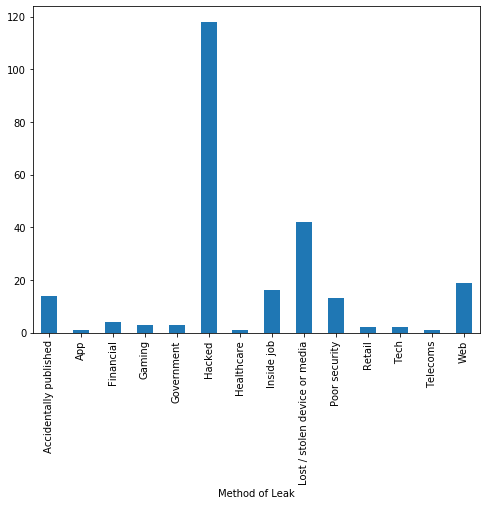

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Method of Leak').Story.count().plot.bar(ylim=0)
plt.show()

### 1.2) Number of Data Breach Incidents in Various Sectors

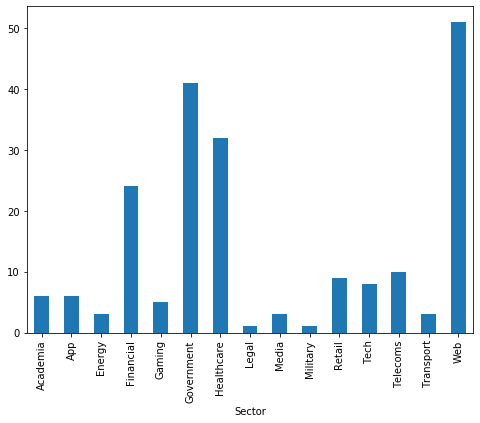

In [5]:
fig = plt.figure(figsize=(8,6))
df.groupby('Sector').Story.count().plot.bar(ylim=0)
plt.show()

### 1.3) Number Of Incidents Per Year (2004-2017)

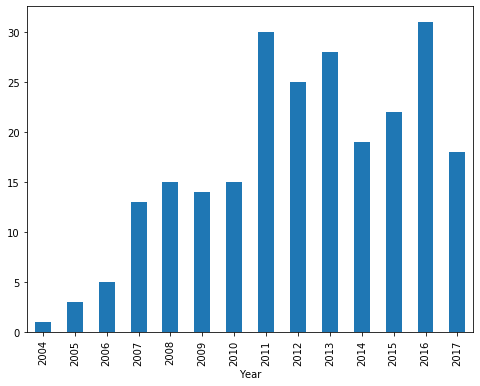

In [6]:
fig = plt.figure(figsize=(8,6))
df.groupby('Year').Story.count().plot.bar(ylim=0)
plt.show()

### 1.4) Number of Records Lost Per Year

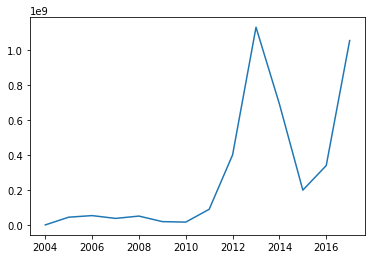

In [7]:
dfplt = pd.DataFrame() 
dfplot = df.groupby('Year')['Records_Lost'].sum()
dh = dfplot.to_frame() 
plt.plot(dh['Records_Lost'])

## 2) Text analysis on Story of DataBreaches using Natural Language Processing

In [8]:
import re
from wordcloud import WordCloud, STOPWORDS
import networkx as nx          
import nltk
from nltk.corpus import stopwords
import itertools
import collections
from nltk import bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob  
from bs4 import BeautifulSoup

### 2.1) Getting the text for analysis

In [9]:
df['Story']
dword = df['Story'].dropna()

In [10]:
dword

0      A dodgy backup has allegedly resulted in over ...
1      A report says that full data base has been exp...
2      A misconfigured spambot has leaked over 700m r...
3      Usernames, email addresses, passwords for site...
4      If you have a credit report, there’s a good ch...
                             ...                        
264    Laptop lost/stolen containing employee data: n...
265    CardSystems was fingered by MasterCard after i...
266    Blame the messenger! A box of computer tapes c...
267    Computer backup tape containing personal infor...
269    A former America Online software engineer stol...
Name: Story, Length: 239, dtype: object

### 2.2) Cleaning the text data

In [11]:
def clean(x):
    x=BeautifulSoup(x).get_text()
    
    #Remove Non-Letters
    x=re.sub('[^a-zA-Z]',' ',x)
    
    #Convert to lower_case and split
    x=x.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    words=[w for w in x if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))
dword=dword.apply(lambda x:clean(x))

In [12]:
display(dword.head(10))

0    dodgy backup allegedly resulted billion leaked...
1    report says full data base exposed aadhaar uni...
2    misconfigured spambot leaked records although ...
3    usernames email addresses passwords sites incl...
4    credit report good chance one million american...
5       email addresses extracted associated passwords
6    oct data numerous malaysian telco mvno provide...
7    feb usernames passwords ip addresses stolen al...
8    user accounts hacked using forged cookies log ...
9      dec app developer failed secure database server
Name: Story, dtype: object

### 2.3) Finding the words in the data and removing stopwords

In [13]:
words_in_story = [story.lower().split() for story in dword]
words_in_story[0]

['dodgy',
 'backup',
 'allegedly',
 'resulted',
 'billion',
 'leaked',
 'email',
 'addresses',
 'plus',
 'personal',
 'info',
 'cases',
 'exposed',
 'rcm',
 'business',
 'plans',
 'operations']

In [14]:
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]

['during', 'on', 'once', 'above', 'nor', "don't", 'had', 'd', 'needn', 'an']

In [15]:
story_nsw = [[word for word in story_words if not word in stop_words]
              for story_words in words_in_story]
story_nsw[0]

['dodgy',
 'backup',
 'allegedly',
 'resulted',
 'billion',
 'leaked',
 'email',
 'addresses',
 'plus',
 'personal',
 'info',
 'cases',
 'exposed',
 'rcm',
 'business',
 'plans',
 'operations']

### 2.3) Storing the count of words and finding most common words

In [16]:
all_words_nsw = list(itertools.chain(*story_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('data', 92),
 ('numbers', 91),
 ('information', 75),
 ('addresses', 64),
 ('million', 63),
 ('security', 61),
 ('stolen', 52),
 ('passwords', 49),
 ('names', 48),
 ('records', 39),
 ('social', 39),
 ('personal', 32),
 ('details', 32),
 ('card', 32),
 ('hackers', 30)]

### 2.4) Ploting the common terms

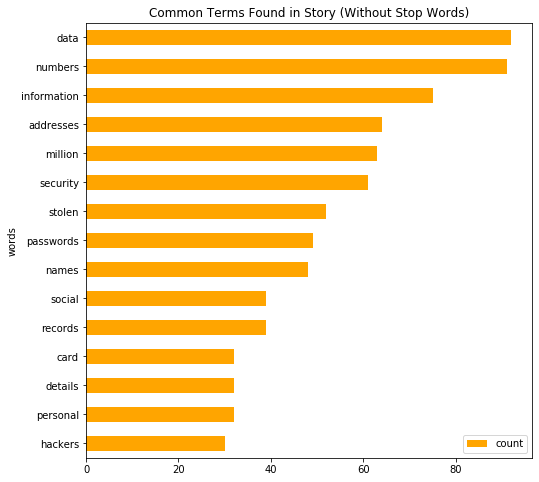

In [17]:
clean_story_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_story_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="orange")

ax.set_title("Common Terms Found in Story (Without Stop Words)")

plt.show()

### 2.5) Exploring some co-occuring terms using bi-grams 

In [18]:
terms_bigram = [list(bigrams(term)) for term in story_nsw]
terms_bigram[0]

[('dodgy', 'backup'),
 ('backup', 'allegedly'),
 ('allegedly', 'resulted'),
 ('resulted', 'billion'),
 ('billion', 'leaked'),
 ('leaked', 'email'),
 ('email', 'addresses'),
 ('addresses', 'plus'),
 ('plus', 'personal'),
 ('personal', 'info'),
 ('info', 'cases'),
 ('cases', 'exposed'),
 ('exposed', 'rcm'),
 ('rcm', 'business'),
 ('business', 'plans'),
 ('plans', 'operations')]

### 2.6) Counting and display top 30 common bi-grams

In [19]:
# Flatten list of bigrams in clean story
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(30)

[(('social', 'security'), 39),
 (('security', 'numbers'), 38),
 (('email', 'addresses'), 20),
 (('credit', 'card'), 17),
 (('names', 'addresses'), 17),
 (('phone', 'numbers'), 16),
 (('dates', 'birth'), 15),
 (('personal', 'information'), 14),
 (('e', 'mail'), 10),
 (('mail', 'addresses'), 10),
 (('card', 'numbers'), 9),
 (('birth', 'dates'), 8),
 (('addresses', 'phone'), 7),
 (('bank', 'account'), 7),
 (('credit', 'debit'), 7),
 (('debit', 'card'), 7),
 (('hard', 'drive'), 7),
 (('unauthorized', 'access'), 6),
 (('addresses', 'passwords'), 6),
 (('license', 'numbers'), 6),
 (('account', 'numbers'), 6),
 (('included', 'names'), 6),
 (('addresses', 'social'), 6),
 (('million', 'people'), 6),
 (('names', 'social'), 6),
 (('user', 'accounts'), 5),
 (('home', 'addresses'), 5),
 (('went', 'missing'), 5),
 (('gained', 'access'), 5),
 (('card', 'data'), 5)]

In [20]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(social, security)",39
1,"(security, numbers)",38
2,"(email, addresses)",20
3,"(credit, card)",17
4,"(names, addresses)",17
5,"(phone, numbers)",16
6,"(dates, birth)",15
7,"(personal, information)",14
8,"(e, mail)",10
9,"(mail, addresses)",10


#### 2.7) Visualizing network of bi-grams 

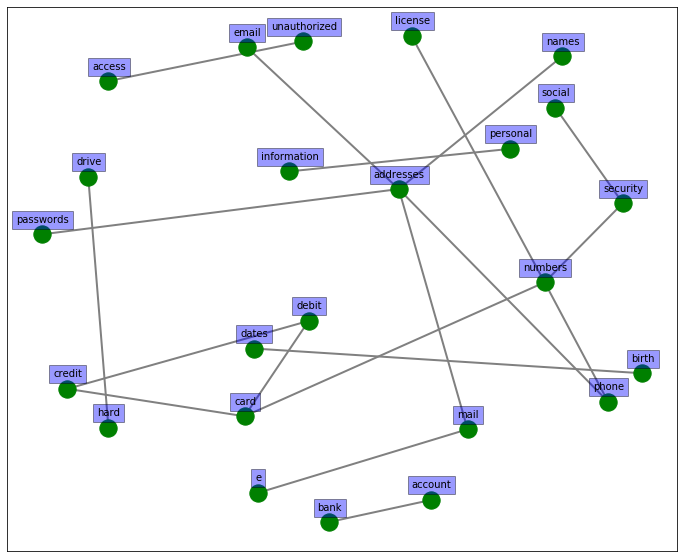

In [21]:
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 3))

fig, ax = plt.subplots(figsize=(12, 10))

pos = nx.spring_layout(G, k=4)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=11,
                 fontweight='bold',
                 width=2,
                 edge_color='grey',
                 node_color='green',
#                  edge_length = 10,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.00167, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.4),
            horizontalalignment='center', fontsize=10)
    
plt.show()

### 2.8) Sentimental Analysis on DataBreach Story Data 

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk import tokenize
sentiment = pd.DataFrame()
sid = SentimentIntensityAnalyzer()

sentiment['sentiment_compound_polarity']=dword.apply(lambda x:sid.polarity_scores(x)['compound'])
sentiment['sentiment_neutral']=dword.apply(lambda x:sid.polarity_scores(x)['neu'])
sentiment['sentiment_negative']=dword.apply(lambda x:sid.polarity_scores(x)['neg'])
sentiment['sentiment_pos']=dword.apply(lambda x:sid.polarity_scores(x)['pos'])
sentiment['sentiment_type']=''
sentiment.loc[sentiment.sentiment_compound_polarity>0,'sentiment_type']='Positive'
sentiment.loc[sentiment.sentiment_compound_polarity==0,'sentiment_type']='Neutral'
sentiment.loc[sentiment.sentiment_compound_polarity<0,'sentiment_type']='Negative'
sentiment.head(3)


,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,-0.5423,0.718,0.282,0.000,Negative
1,-0.3612,0.789,0.129,0.082,Negative
2,-0.6597,0.597,0.403,0.000,Negative


In [23]:
sentiment.sentiment_type.value_counts()

Negative    139
Positive     61
Neutral      39
Name: sentiment_type, dtype: int64

### We can clearly see that negative stories are more as it is all about data breach

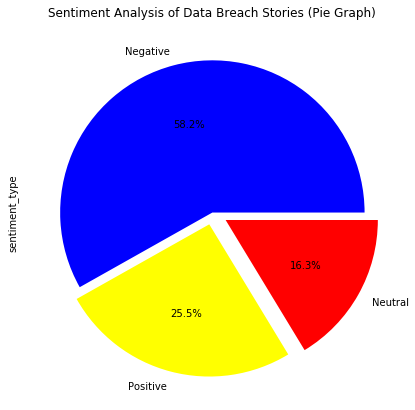

In [24]:
colors = ['blue', 'yellow', 'red']
explode = (0, 0.08, 0.1)
sentiment.sentiment_type.value_counts().plot(kind='pie', figsize=(9, 7), title="Sentiment Analysis of Data Breach Stories (Pie Graph)", colors=colors, explode=explode,autopct='%1.1f%%', shadow=False)

## 3) Machine Learning Techniques to predict method of Data Breach

### 3.1)Preprocessing of Data 

**3.1.1) counting categories of data**

In [3]:
df['Method of Leak'].value_counts()

Hacked                           136
Lost / stolen device or media     46
Web                               21
Inside job                        18
Accidentally published            16
Poor security                     15
Financial                          4
Gaming                             4
Government                         3
Retail                             2
Tech                               2
Telecoms                           1
Healthcare                         1
App                                1
Name: Method of Leak, dtype: int64

In [4]:
list(df.columns.values)

['Entity', 'Story', 'Year', 'Records_Lost', 'Sector', 'Method of Leak']

In [5]:
dfmodel = pd.DataFrame()
dfmodel['Story'] = df['Story']
dfmodel['Method of Leak'] = df['Method of Leak']

In [6]:
dfmodel

,Story,Method of Leak
0,A dodgy backup has allegedly resulted in over ...,Web
1,A report says that full data base has been exp...,Poor security
2,A misconfigured spambot has leaked over 700m r...,Web
3,"Usernames, email addresses, passwords for site...",Web
4,"If you have a credit report, there’s a good ch...",Financial
...,...,...
265,CardSystems was fingered by MasterCard after i...,Hacked
266,Blame the messenger! A box of computer tapes c...,Lost / stolen device or media
267,Computer backup tape containing personal infor...,Lost / stolen device or media
268,NaN,Poor security


In [7]:
dfmodel = dfmodel.dropna()

In [8]:
dfmodel.head()

,Story,Method of Leak
0,A dodgy backup has allegedly resulted in over ...,Web
1,A report says that full data base has been exp...,Poor security
2,A misconfigured spambot has leaked over 700m r...,Web
3,"Usernames, email addresses, passwords for site...",Web
4,"If you have a credit report, there’s a good ch...",Financial


In [9]:
dfmodel['Method of Leak'].value_counts()

Hacked                           118
Lost / stolen device or media     42
Web                               19
Inside job                        16
Accidentally published            14
Poor security                     13
Financial                          4
Government                         3
Gaming                             3
Retail                             2
Tech                               2
Telecoms                           1
Healthcare                         1
App                                1
Name: Method of Leak, dtype: int64

**3.1.2) We will be picking only top five category for our machine learning model as other categories have less observations and we will remove rows containing NaN**

In [10]:
dfmodel["label"] = dfmodel['Method of Leak'].map({'Hacked':0,     
'Lost / stolen device or media':1,
'Inside job ' : 2,
'Accidentally published' : 3,
'Poor security' : 4, 
'Inside job' : 5 })

/home/samroadie/somy/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
dfmodel = dfmodel.dropna()

In [12]:
dfmodel

,Story,Method of Leak,label
1,A report says that full data base has been exp...,Poor security,4.0
5,"85.2m email addresses extracted, but only 18.3...",Hacked,0.0
6,Oct. Data from numerous Malaysian telco & MVNO...,Hacked,0.0
9,Dec. The app's developer failed to secure the ...,Poor security,4.0
12,July. South Korean police are blaming North Ko...,Hacked,0.0
...,...,...,...
262,Press report: Tokyo police have arrested two m...,Hacked,0.0
264,Laptop lost/stolen containing employee data: n...,Lost / stolen device or media,1.0
265,CardSystems was fingered by MasterCard after i...,Hacked,0.0
266,Blame the messenger! A box of computer tapes c...,Lost / stolen device or media,1.0


**3.1.3) We will tokenize our story input and count the terms using text data preprocessing methods**

In [13]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dfmodel['Story'])

### 3.2) Creating the testing and training dataset , here X is the input story and y is the method of Leak 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, dfmodel['label'], test_size=0.2,shuffle=True, random_state=105)

**Let’s have a look at the models used and the accuracy achieved in each, along with some important terms used**<br>
* **Accuracy: (True Positive + True Negative) / Total Population**
    * Accuracy is a ratio of correctly predicted observation to the total observations.
    * True Positive: The number of correct predictions that the occurrence is positive
    * True Negative: The number of correct predictions that the occurrence is negative
* **F1-Score: (2 x Precision x Recall) / (Precision + Recall**
    * F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
* **Precision:** When a positive value is predicted, how often is the prediction correct?
* **Recall:** When the actual value is positive, how often is the prediction correct?

### 3.3) Applying Multinomial Naive Bayes classifier model for Prediction

In [15]:
model1 = MultinomialNB().fit(X_train, y_train)
md1predicted= model1.predict(X_test)

In [16]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, md1predicted))

MultinomialNB Accuracy: 0.7560975609756098


In [17]:
print("confusion_matrix",confusion_matrix(y_test,md1predicted))

confusion_matrix [[22  4  0  0  1]
 [ 0  8  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 0  1  0  0  1]]


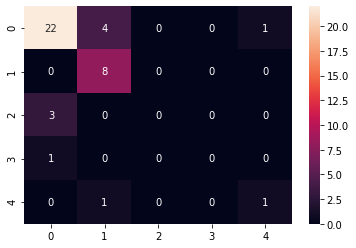

In [18]:
conf_mat = confusion_matrix(y_test,md1predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")

In [19]:
print("classification_report")
print(classification_report(y_test,md1predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        27
         1.0       0.62      1.00      0.76         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.50      0.50      0.50         2

    accuracy                           0.76        41
   macro avg       0.39      0.46      0.42        41
weighted avg       0.70      0.76      0.72        41



/home/samroadie/somy/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.4) Applying Random Forest Model for Prediction

In [20]:
model2 = RandomForestClassifier(n_estimators=1000, random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
md2predicted = model2.predict(X_test)

In [22]:
print("Random Forest Accuracy",metrics.accuracy_score(y_test, md2predicted))

Random Forest Accuracy 0.8048780487804879


In [23]:
print("confusion_matrix",confusion_matrix(y_test,md2predicted))

confusion_matrix [[26  0  0  0  1]
 [ 1  7  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]]


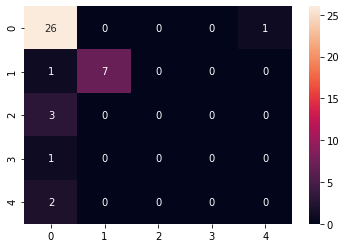

In [24]:
conf_mat = confusion_matrix(y_test,md2predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")

In [25]:
print("classification_report")
print(classification_report(y_test,md2predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        27
         1.0       1.00      0.88      0.93         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2

    accuracy                           0.80        41
   macro avg       0.36      0.37      0.36        41
weighted avg       0.71      0.80      0.75        41



/home/samroadie/somy/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.5) Applying Stochastic Gradient Descent model for prediction

In [48]:
model3 = SGDClassifier().fit(X_train, y_train)
model3.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
md3predicted = model3.predict(X_test)

In [50]:
print("SGD Accuracy",metrics.accuracy_score(y_test, md3predicted))

SGD Accuracy 0.7317073170731707


In [51]:
print("confusion_matrix")
print(confusion_matrix(y_test,md3predicted))

confusion_matrix
[[22  1  0  4  0]
 [ 0  8  0  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]]


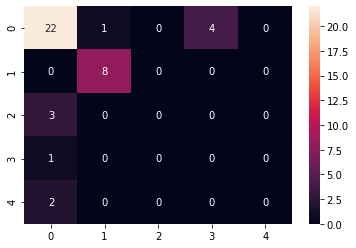

In [52]:
conf_mat = confusion_matrix(y_test,md3predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")

In [53]:
print("classification_report")
print(classification_report(y_test,md3predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        27
         1.0       0.89      1.00      0.94         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2

    accuracy                           0.73        41
   macro avg       0.33      0.36      0.35        41
weighted avg       0.69      0.73      0.71        41



/home/samroadie/somy/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.6) Applying Gradient Boosting Classifier Model for Prediction

In [54]:
model4 = GradientBoostingClassifier().fit(X_train, y_train)
model4.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
md4predicted = model4.predict(X_test)

In [56]:
print("Gradient Boosting Classifier Accuracy",metrics.accuracy_score(y_test, md4predicted))

Gradient Boosting Classifier Accuracy 0.7560975609756098


In [57]:
print("confusion_matrix")
print(confusion_matrix(y_test,md4predicted))

confusion_matrix
[[25  0  0  0  2]
 [ 2  5  0  0  1]
 [ 3  0  0  0  0]
 [ 1  0  0  0  0]
 [ 1  0  0  0  1]]


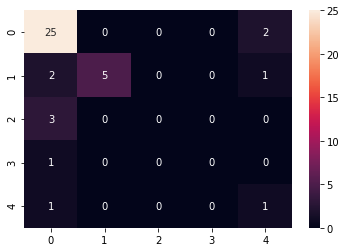

In [58]:
conf_mat = confusion_matrix(y_test,md4predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")

In [59]:
print("classification_report")
print(classification_report(y_test,md4predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        27
         1.0       1.00      0.62      0.77         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.25      0.50      0.33         2

    accuracy                           0.76        41
   macro avg       0.41      0.41      0.39        41
weighted avg       0.72      0.76      0.72        41



/home/samroadie/somy/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.7) Applying XGBoost Model for Prediction

In [60]:
model5 = XGBClassifier().fit(X_train, y_train)
model5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [61]:
md5predicted = model5.predict(X_test)

In [62]:
print("XGBOOST Accuracy",metrics.accuracy_score(y_test, md5predicted))

XGBOOST Accuracy 0.7073170731707317


In [63]:
print("confusion_matrix")
print(confusion_matrix(y_test,md5predicted))

confusion_matrix
[[22  2  2  1  0]
 [ 1  7  0  0  0]
 [ 2  1  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]]


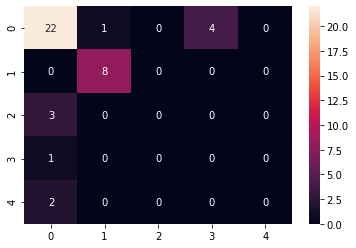

In [64]:
conf_mat = confusion_matrix(y_test,md3predicted)
ax = sns.heatmap(conf_mat, annot=True, fmt="d")

In [65]:
print("classification_report")
print(classification_report(y_test,md5predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80        27
         1.0       0.70      0.88      0.78         8
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2

    accuracy                           0.71        41
   macro avg       0.30      0.34      0.32        41
weighted avg       0.65      0.71      0.68        41



### 3.8) Which Model is The Best

In [66]:
model_name = ['MNB','RandomForest','SGD','GradientBoosting','XGBoost']

In [67]:
accuracy = [metrics.accuracy_score(y_test, md1predicted),metrics.accuracy_score(y_test, md2predicted),metrics.accuracy_score(y_test, md3predicted),metrics.accuracy_score(y_test, md4predicted),metrics.accuracy_score(y_test, md5predicted)]

In [68]:
accuracy

[0.7560975609756098,
 0.8048780487804879,
 0.7317073170731707,
 0.7560975609756098,
 0.7073170731707317]

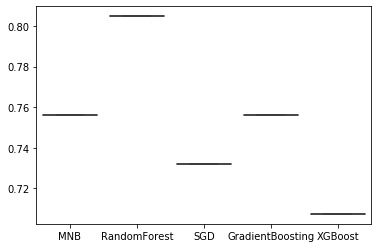

In [69]:
import seaborn as sns
sns.boxplot(model_name,accuracy)

## Conclusion

After doing exploratory data analysis we find out following observations:</br>
Hacking was the most frequent method of data leakage[1.1]. Further we saw the large no incidents happen in the web sector , which is quite obvious as we discussed large number of database being online and vulnerable to hackers[1.2].Number incidents were quite high in year 2011 which could be seen in [1.3].There was a increase in number of record lost year 2011 to 2013 then a gradual drop , but then from 2015 such incidents again increased[1.4].
<br>
<br>
Further we deep dived into the textual part of our dataset which is the incident description and tried to find out most common words[2.4],bigrams[2.6] (such as (social ,security),(credit ,cards),etc.) and tried to find  a network and relation between these bigrams[2.7].Then we did sentimental analysis on databreach text data and it was expected that 58.2% of the data had a negative sentiment[2.8].
<br><br>
At last we tried to model our data breach text data using various ML Models such as Multinomial Naive Bayes Classifier[3.3] , Random Forest For Prediction [3.4] , Stochastic Gradient Descent Model [3.5] , Gradient Boosting Model [3.6] and XG Boost [3.7] . And later we discussed that Random Forest was the best model for our data to predict method of leak from the given text data with an accuracy of 80.48%.<br><br>
For future versions of this project would like to incorporate time Series Analysis of dataset such that future attacks can we prevented by prior prediction. Thus the project will be able to not only able to predict method of data leak but also forecast future attacks

## References

**1)** A Review of Machine Learning Algorithms for Text-Documents Classification. Journal of Advances in Information Technology. 1. 10.4304/jait.1.1.4-20.  Baharudin, Baharum & Lee, Lam Hong & Khan, Khairullah & Khan, Aurangzeb. (2010). 
<br>
**2)** A Worldwide Analysis of Cyber Security And Cyber Crime using Twitter Kartikay Sharma, Siddharth Bhasin, Piyush Bharadwaj [International Journal of Engineering and Advanced Technology (IJEAT) ISSN: 2249 – 8958, Volume-8 Issue-6S3, September 2019] .
